# Impact of IPO Exit Round and Operating Sector on Stock Price Behavior

---------------

**Principle Investigator**: Motoi Oyane <br> **Email**: mo1414@nyu.edu  

---------------

## Project Description

### Abstract

This project studies how a company's IPO Exit Round and Operating Sector is related to the stock price behavior after IPO. I will specifically target companies that were VC-backed, head quartered in United States (US), and exited through IPO. This analysis is especially relevent in 2019 as we are anticipating many Unicorns to go public, after Lyft's poor and Beyond Meat's strong market debut.


### Process Outline

The key elements of the project is the use of [CBInsight's Data Collection](https://www.cbinsights.com/search/deals) that provides access to the companies that fit the criteria above and [Alpha Vantage's API](https://www.alphavantage.co/) that provides access to the daily stock prices of each company. The following is the description of the dataset that I will obtain and will need.

- **pre-IPO data from CBInsight Dataset**: I will obtain the data set from [https://www.cbinsights.com/search/deals](https://www.cbinsights.com/search/deals) where I will filter the search by Geography (United States), Company Status (IPO/went public), and Backing (Only show VC-backed companies). The data will be exported in csv format, which I will import on jupyter as a DataFrame. I will clean this data by removing irrelavent data attributes for each companies such as "# of Twitter Followers", "Min Valuation", "URL" (shown below in Data Report), removing companies with insufficient information, and by keeping companies that were funded in Seed and/or Series A~I. 
- **stock price from Alpha Vantage API**: Then, I will re-import the data as csv and access the API for Alpha Vantage (using a free API key that they issue: [https://www.alphavantage.co/](https://www.alphavantage.co/)) to download the daily share price for each company. 

After the collecting the full data, the project will have three sections:

1. **Analyzing the data** - Making a new dataframe with: ticker, company name, sector, exit round, IPO date, pre-IPO max valuation, total funding, cumulative return after 1-12 months

2. **Grouping the data** - Grouping the companies:

 - ***exit round***: Early Stage (Seed, Series A, B), Growth Stage (Series C-D), Late Stage (Series E-I)
 - ***Sectors***
 
 
3. **Plotting the data** - Plotting the four sets of graphs:

 - Line Graph: ***cumulative return vs time since IPO*** of each of the exit round groups
 - Bar Graphs: ***cumulative return 12 months after IPO*** of each of the sectors
 - Line Graph: ***cumulative return vs time since IPO*** of a company in the best performing exit round group and sector
  
### Hypothesis 

- Companies that exited in the Growth Stage will have the highest ***cumulative returns vs time since IPO***
- Companies in the Healthcare sector will have the highest ***cumulative return 12 months after IPO***

### Limitations

There are few potential limitations to the process and the outcome:

- There is a manual process of gathering ticker names, which limits the efficiency and flexibility of the project. This is due to the data output of the CBInsights' dataset because the company names are not given as the full legal name (e.g. Facebook, Inc. will be given as Facebook) and there are no available APIs that allow abbreviated names to be matched with official tickers to be downloaded.

- Through my investigation of th data I found out that Alpha Vantage did not have the stock price because these companies were delisted from the market, so I will need to remove them from my investigation.

- Through my investigation of th data I found out that Alpha Vantage only had the daily stock data from 1998-01-02 so I have to adjust my time-series analysis accordingly.

- The groupings/graphs may not present an accurate representation of the stock price behavior because within each group there are companies that:
   - went private, acquired or merged after a period of time so it may be not sensible to group these companies together with ones that are still public.
   - went public too recently so not all cumulative returns will not be available and it may not be sensible to compare the statistics of these companies to those that have been public for a logner period of time.

### References

 “Company Search.” CBInsights, 8 Apr. 2019, www.cbinsights.com/search/company. <br>
 "Stock Time Series." Alpha Vantage, 11 May 2019, www.alphavantage.co/documentation/#time-series-data.
 
---------------


## Contents 

**[Section 0: Download Necessary Data](#Section-0:-Download-Necessary-Data)** 
    
    0.1 Import Reqsuite Packages
    0.2 Grab CBInsights Data
    0.3 Clean CBInsights Data
    0.4 Manually Add Tickers
    0.5 Grab Daily Stock Prices from Alpha Vantage
    0.6 Organize Alpha Vantage's Data


**[Section 1: Assemble the Data](#Section-1:-Assemble-the-Data)**

    1.1 Tickers
    1.2 Company Name
    1.3 Sector, Exit Round, pre-IPO Max Valuation, Total Funding, IPO Date
    1.4 Cumulative Returns

**[Section 2. Group the Data](#Section-2:-Group-the-Data)**

    2.1 By Exit Round
    2.2 By Sector
        
**[Section 3. Plot the Data](#Section-3:-Plot-the-Data)**

    3.1 Cumulative Returns vs. Time (by Exit Round)
    3.2 Cumulative Returns after 12 months (by Sector)
    3.3 Cumulative Returns vs. Time (Company)
    
-------------------

##  Report

### Section 0: Download Necessary Data

This section is mainly dedicated to importing and cleaning raw data.

### 0.1 Import Requisite Packages 
Below I bring in the packages I need.

In [267]:
import pandas as pd             
import requests                              # This is useful with the API
import numpy as np                           # For performing numerical analysis
import matplotlib.pyplot as plt              # For plotting
import datetime as dt                        # For handling dates
import time                                  # For getting data from Alpha Vantage
import sys                                   # For getting data from Alpha Vantage
from IPython.display import Image, display   # For displaying DataFrames and images

### 0.2 Grab CBInsights Data 
Below I read in the pre-IPO data from CBInsights.

In [6]:
# Grabbed the data in csv format. The link below is the url of the csv uploaded on github.
ipo_data_url = "https://raw.githubusercontent.com/motoioyane/VCbacked_IPO_DataAnalysis/master/VCbacked_IPOdata.csv"

# Read in the csv
cbinsights = pd.read_csv(ipo_data_url)

### 0.3 Clean CBInsights Data 
Below I clean the data... <br>
 - Drop necessary columns
 - Keep companies with sufficient information
 - Rename columns
 - Convert "exitdate" to datetime64
 - Create new column for tickers
 - Rearrange columns 

In [7]:
# Drop columns unnecessary for analysis

unsorted_IPOdf = cbinsights.drop(columns=['Company Description', 'All Investors', 'Sub-Industry',
                                          'URL', 'Phone', 'Email', 'Exit Round','Country', 
                                          'Min Valuation', 'Min Price/Sales Ratio', 'VC Backed', 
                                          'Max Price/Sales Ratio','Last Funding Round', 'City',
                                          'Private Collections', 'Expert Collections',  'Continent', 
                                          'Expert Collections', 'Twitter Score', '# Twitter Followers', 
                                          'Twitter Engagement', 'Followers to Following', 
                                          'Twitter Followers Growth', 'Twitter Handle', 
                                          'Last Funding Investors','Twitter Mentions Growth', 
                                          'Last Funding Amount'])

In [8]:
# Keep companies with sufficient information

# Funding Round

fundinground = ['Seed VC', 'Series A', 'Series B', 'Series C','Series D', 
                'Series E', 'Series F', 'Series G', 'Series H','Series I']

funding_IPOdf = unsorted_IPOdf[unsorted_IPOdf["Last Funding Simplified Round"].isin(fundinground)]

# Remove Max Valuation == "NaN"

ValNaN = funding_IPOdf[funding_IPOdf["Max Valuation"].isin(["NaN"])]
cond = funding_IPOdf['Max Valuation'].isin(ValNaN['Max Valuation']) == True
valuation_IPOdf = funding_IPOdf.drop(funding_IPOdf[cond].index)

In [9]:
# Rename columns

IPOdf = valuation_IPOdf.rename(columns = {"Company":"company",
                                          "Total Funding":"totalfunding",
                                          "Sector":"sector",
                                          "Industry":"industry",
                                          "Last Funding Date": "lastfundingdate",
                                          "State":"state", 
                                          "Exit Date": "exitdate", 
                                          "Last Funding Simplified Round": "exitround", 
                                          "Max Valuation":"pre_ipo_val"})

In [10]:
# Convert exitdate to datetime64

IPOdf['exitdate'] = IPOdf['exitdate'].astype('datetime64', format = "%Y-%m-%d")

In [11]:
# Create new column for tickers

IPOdf['ticker'] = ""

In [12]:
# Rearrange columns

IPOdf = IPOdf[["company", "sector", "industry","state","ticker","exitdate",
               "exitround","totalfunding","lastfundingdate","pre_ipo_val"]]

In [13]:
# Preview of DataFrame
IPOdf.head()

,company,sector,industry,state,ticker,exitdate,exitround,totalfunding,lastfundingdate,pre_ipo_val
0,1-800-FLOWERS.COM,Internet,eCommerce,New York,,1999-08-03,Series E,112.64,1999/05/13,1302.00
1,2U,Internet,Internet Software & Services,Maryland,,2014-03-28,Series D,106.91,2013/10/21,508.69
2,A10 Networks,Software (non-internet/mobile),Networking & Connectivity Software,California,,2014-03-21,Series D,153.00,2013/10/03,885.43
3,ACADIA Pharmaceuticals,Healthcare,Biotechnology,California,,2004-05-11,Series E,47.70,2000/05/01,117.92
5,AMC Entertainment Hodings,Leisure,Entertainment,Kansas,,2013-12-18,Series A,6.00,2000/10/01,346.06


### 0.4 Manually Add Tickers
Below I add in the tickers manually.

In [14]:
# Grabbed the data in csv format. The link below is the url of the csv uploaded on github.

ticker_url = "https://raw.githubusercontent.com/motoioyane/VCbacked_IPO_DataAnalysis/master/IPOdf_with_ticker.csv"

# Read in the csv

IPOticker = pd.read_csv(ticker_url)

In [16]:
# Convert exitdate to datetime

IPOticker['exitdate'] = IPOticker['exitdate'].astype('datetime64', format = "%Y/%m/%d")

In [146]:
# Rename column

IPOticker.rename(columns = {" pre_ipo_val ": "pre_ipo_val"}, inplace = True)

In [147]:
# Preview of DataFrame
IPOticker.head()

,company,sector,industry,state,ticker,exitdate,lastround,totalfunding,lastfundingdate,pre_ipo_val
0,Heska,Healthcare,Pharmaceuticals / Drugs,Colorado,HSKA,1997-07-02,Series A,36.0,1995/01/01,152.78
1,Rambus,Electronics,Chips & Semiconductors,California,RMBS,1997-05-06,Series B,8.0,1995/01/01,257.44
2,NeoMagic,Electronics,Chips & Semiconductors,California,NMGC,1997-03-14,Series A,9.0,1995/07/01,279.98
3,Aradigm Corporation,Healthcare,Drug Delivery,California,ARDM,1996-07-09,Series B,11.5,1995/10/01,39.3
4,Nanophase Technologies Corporation,Electronics,Electronic Manufacturing Services,Illinois,NANX,1997-11-26,Series A,3.0,1995/10/01,11.58


### 0.5 Grab Daily Stock Prices from Alpha Vantage
Below I download the stock price data from Alpha Vantage using a forloop.

The for-loop will go through the above DataFrame (IPOticker) where for every ticker in the DataFrame, the loop will make an unique API URL. The API URL will then be ran through pd.read_csv() and this will download the the daily stock prices. Since Alpha Vantage has a 5 calls per minute limit, I will use the time and sys package to automatically run the for loop every minute. 

It is also important to note here that not all ticker data is available on Alpha Vantage so these unavailable data will be removed in the next section.

In [18]:
# List of all tickers in IPO ticker
tickerlist = IPOticker.ticker.tolist()

In [19]:
# Below is the for-loop to download the stock price data from Alpha Vantage

tickerCount          = 0            # Counts how many tickers I recieved so far
Waiting_time_seconds = 70           # How long to wait for every 5 calls 

for each_ticker in tickerlist:
    
    tickerCount = tickerCount + 1                        
    
    # Run a if statement so for every 5 calls, the program stops running for 70 seconds.
    # Print "sleeping..." to know the program is running/waiting
    
    if tickerCount > 1 and tickerCount%5 == 1:
        print("sleeping...\n")
        print(tickerCount)
        sys.stdout.flush()
        time.sleep(Waiting_time_seconds)
    
    # Concatenate URL for Alpha Vantage URL
    
    data_set = "https://www.alphavantage.co/query?function=" + "TIME_SERIES_DAILY"
    ticker = "&symbol=" + each_ticker    # This sets a unique URL for each ticker
    mykey = "RLJ7GZA1AQX2UQGW"           # Free API key avaialble on Alpha Vantage
    APIkey = "&apikey=" + mykey      
    output = "&outputsize=full"          # This will allow all avaiable daily data to be downlaoded
    datatype = "&datatype=csv"           # This will allow the data to be downlaoded in csv format
    
    APIurl = data_set + ticker + APIkey + output + datatype

    # Print "Fetching with" + APIurl to know that the program is downloading data
    
    print("Fetching with url " + APIurl)

    # Download and read the csv into a DataFrame
    # Set a unique variable name (ticker name) for each csv (Facebook data will be "FB")
    
    exec('{} = pd.read_csv(APIurl)'.format(each_ticker))
    
    # Print "Downloaded " + ticker to know that the data is downloaded 
    
    print("Downloaded" + each_ticker)

Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=HSKA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedHSKA
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=RMBS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedRMBS
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NMGC&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedNMGC
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ARDM&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedARDM
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NANX&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedNANX
sleeping...

6
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CERS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedCERS
Fetching with url https://www.a

DownloadedLPSN
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=STOR&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSTOR
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=INSM&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedINSM
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AIRO&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedAIRO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SGEN&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSGEN
sleeping...

56
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=EXAS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedEXAS
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ACAD&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedACAD
Fetching with u

DownloadedTTPY
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TNAV&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedTNAV
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=INWK&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedINWK
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PODD&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedPODD
sleeping...

106
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=YOGA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedYOGA
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ECHO&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedECHO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=WIFI&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedWIFI
Fetching with 

DownloadedCAPR
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=VCRA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedVCRA
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CMRX&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedCMRX
sleeping...

156
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=RNVA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedRNVA
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=FB&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedFB
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GRPN&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedGRPN
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SING&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSING
Fetching with url 

DownloadedNVRO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QTWO&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedQTWO
sleeping...

206
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AKAO&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedAKAO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TTOO&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedTTOO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=HTBX&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedHTBX
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ESPR&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedESPR
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=RDUS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedRDUS
sleeping...

2

DownloadedETSY
sleeping...

256
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PRTO&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedPRTO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CHRS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedCHRS
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SFIX&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSFIX
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CERC&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedCERC
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CALA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedCALA
sleeping...

261
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DERM&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedDE

DownloadedEDIT
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SENS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSENS
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=WVE&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedWVE
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SNDX&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSNDX
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NTLA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedNTLA
sleeping...

311
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=OKTA&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedOKTA
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PTI&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedPTI
Fetching with url 

DownloadedMNLO
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SILK&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedSILK
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ARAV&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedARAV
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=KZR&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedKZR
sleeping...

361
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=APLS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedAPLS
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=EYEN&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedEYEN
Fetching with url https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GRTS&apikey=RLJ7GZA1AQX2UQGW&outputsize=full&datatype=csv
DownloadedGRTS
Fetching with ur

### 0.6 Organize Alpha Vantage's Data

Below I organize Alpha Vantage's stock price data...

- Store every dataframe into a list for data analysis
- Remove anyticker data that was not available on Alpha Vantage
- Set index for all DataFrame to datetime

In [183]:
# Store every dataframe into a list for data analysis

stocklist = []

for ticker in tickerlist:
    stocklist.append(vars()[ticker])

In [188]:
# Remove any ticker data that was not available on Alpha Vantage

for i in range(0,len(stocklist)):
    if stocklist[i].shape < (4,4):
        stocklist.pop(i)

In [189]:
# Set index for all DataFrame to datetime

for item in stocklist:
    if 'timestamp' in item.columns:
        item.set_index("timestamp", inplace = True)

In [194]:
# Convert index to DatetimeIndex

for item in stocklist:
    if type(item.index[1]) == str:
        item.index = item.index.astype('datetime64')

In [198]:
# Sample Preview of Stock Price Data
stocklist[340].head(3)

,open,high,low,close,volume
timestamp,,,,,
2019-05-10,9.28,9.4437,8.7938,9.10,17238
2019-05-09,9.40,9.6475,8.9600,9.37,22851
2019-05-08,9.04,9.6600,8.9000,9.50,54280


### Sub-Summary

Section 0 downloaded and organized all the necessary information. <br>
Here are the three key variables introduced in the section, which are used in the following sections:

- **IPOticker**: DataFrame with individual company data (including tickers)
- **tickerlist**: List of all tickers 
- **stocklist**: List of all DataFrames (daily stock price data) for each company, downloaded from Alpha Vantage

### Section 1: Assemble the Data

This section is dedicated to assemble the data from the previous section to a single DataFrame.

In [121]:
# This is the DataFrame for the aggregation

IPOstockdf = pd.DataFrame([])

### 1.1 Tickers

Below I add tickers to IPOstockdf...

- Create an empty column: "tickers"
- Add tickers to the column from tickerlist, if it was downloaded from Alpha Vantage
- Remove empty cells
- Reset index

In [122]:
# Empty column of length len(tickerlist) = 397

IPOstockdf["ticker"] = [""] * len(tickerlist)

In [123]:
# For-loop to add tickers that are in stocklist:

# This says that for every ticker in in the tickerlist,
# if the Stock Price Data corresponding to the ticker was donwloaded in the stocklist,
# add the ticker in in the new DataFrame, IPOstockdf

for i in range(0,len(tickerlist)):
    for j in range(0,len(stocklist)):
        if vars()[tickerlist[i]].equals(stocklist[j]):
            IPOstockdf["ticker"][i] = tickerlist[i]

In [124]:
# Remove the empty cells

# Here is the list of all indices of the tickers that are not in the stocklist

removing_index = IPOstockdf[IPOstockdf.ticker == ""].index.tolist()

# Drop all row containing the index

IPOstockdf.drop(IPOstockdf.index[removing_index], inplace = True)

In [125]:
# Reset all index

IPOstockdf.reset_index(drop = True, inplace = True)

### 1.2 Company Name

Below I add company names to IPOstockdf...

- Create a new column: "company"
- Add company name from IPOticker next to the corresponding ticker, if ticker from tickerlist exist in IPOstockdf

In [127]:
# Create "company" column

IPOstockdf["company"] = ""

In [135]:
# For-loop to add the company names:

# This says for every ticker in the IPOstockdf,
# if the ticker is in the tickerlist,
# grab the comapny name from IPOticker and add it to IPOstockdf

for i in range(0,len(IPOstockdf.ticker)):
    if IPOstockdf.ticker[i] in tickerlist:
        
        ticker_in = IPOticker.ticker == IPOstockdf.ticker[i]   # Confirm that ticker is in IPOstockdf
        
        company_name = IPOticker.company[ticker_in].tolist()   # Grab the corresponding company from IPOticker
        
        IPOstockdf["company"][i] = company_name[0]             # Add it to IPOstockdf

### 1.3 Sector, Exit Round,  IPO Date, Pre-IPO Max Valuation, Total Funding

Below I add the Sector, Exit Round, IPO Date, Pre-IPO Max Valuation, and Total Funding for each company using the same method as above. I then reformat the data...

- Convert Max Valuation to float64
- Convert IPO Date to datetime64

In [137]:
# Create columns: "sector", "exitround", "ipo_date", "malval", "total funding"

IPOstockdf["sector"] = ""
IPOstockdf["exitround"] = ""
IPOstockdf["ipo_date"] = ""
IPOstockdf["maxval"] = ""
IPOstockdf["totalfunding"] = ""

In [148]:
# Do the same thing as "company" for each columns

for i in range(0,len(IPOstockdf.ticker)):
    if IPOstockdf.ticker[i] in tickerlist:
        IPOstockdf["exitround"][i] = IPOticker.lastround[IPOticker.ticker == IPOstockdf.ticker[i]].tolist()[0]
        IPOstockdf["sector"][i] = IPOticker.sector[IPOticker.ticker == IPOstockdf.ticker[i]].tolist()[0]
        IPOstockdf["maxval"][i] = IPOticker.pre_ipo_val[IPOticker.ticker == IPOstockdf.ticker[i]].tolist()[0]
        IPOstockdf["totalfunding"][i] = IPOticker.totalfunding[IPOticker.ticker == IPOstockdf.ticker[i]].tolist()[0]
        IPOstockdf["ipo_date"][i] = IPOticker.exitdate[IPOticker.ticker == IPOstockdf.ticker[i]].tolist()[0]

In [150]:
# Remove "," from maxval

maxvallist = IPOstockdf["maxval"].tolist()

for i in range(0, len(maxvallist)):
    maxvallist[i] = maxvallist[i].replace(",","")
    
for i in range(0, len(maxvallist)):
    IPOstockdf.maxval[i] = maxvallist[i]

In [158]:
# Convert to float

IPOstockdf['maxval'] = IPOstockdf["maxval"].astype("float64")

In [157]:
# Convert ipo_date to datetime

IPOstockdf['ipo_date'] = IPOstockdf['ipo_date'].astype('datetime64', format = "%Y/%m/%d")

### 1.1.4 Cumulative Returns

Below I add the cumulative returns of each stock after a selected period of time. 

I run a for-loop that will first check on each DataFrame in stocklist if the date after the selected period since IPO exists. (Here, it is crucial to be mindful of trading dates so the loop will check multiple dates.) If it does, the loop will grab the price corresponding to the date, calculate the cumuative return and add that to IPOstockdf.

In [159]:
# Create cumulative returns column

IPOstockdf["cum_return_1mn"] = ""
IPOstockdf["cum_return_2mn"] = ""
IPOstockdf["cum_return_3mn"] = ""
IPOstockdf["cum_return_4mn"] = ""
IPOstockdf["cum_return_5mn"] = ""
IPOstockdf["cum_return_6mn"] = ""
IPOstockdf["cum_return_7mn"] = ""
IPOstockdf["cum_return_8mn"] = ""
IPOstockdf["cum_return_9mn"] = ""
IPOstockdf["cum_return_10mn"] = ""
IPOstockdf["cum_return_11mn"] = ""
IPOstockdf["cum_return_12mn"] = ""

In [199]:
# Here is a list of the columns to add the data to

cum_return_list = ['cum_return_1mn', 'cum_return_2mn', 'cum_return_3mn',
                   'cum_return_4mn', 'cum_return_5mn', 'cum_return_6mn', 
                   'cum_return_7mn','cum_return_8mn', 'cum_return_9mn', 
                   'cum_return_10mn','cum_return_11mn', 'cum_return_12mn']

# Here is the for-loop described above

for i in range(0,len(stocklist)):

    for j in range(0, len(cum_return_list)):
        
        # Set mutiple dates to check for trading days
        # Every month is assumed to be 30 days
        
        time_00 = stocklist[i].index[len(stocklist[i])-1] + dt.timedelta((j+1)*30)
        time_10 = stocklist[i].index[len(stocklist[i])-1] + dt.timedelta((j+1)*30+1)
        time_20 = stocklist[i].index[len(stocklist[i])-1] + dt.timedelta((j+1)*30+2)
        time_01 = stocklist[i].index[len(stocklist[i])-1] + dt.timedelta((j+1)*30-1)

        # Set initial price
        
        price_0 = stocklist[i].close[len(stocklist[i])-1]    
        
        # Check if the dates are trading days
        # "else: price_t = price_0" is used for companies 
        # with trading history of less than 12 months
        # so that cumulative return = 0
        # (next part will be utilizing this 0).
        
        if time_00 in stocklist[i].index:
            price_t = stocklist[i].close[time_00]
        elif time_10 in stocklist[i].index:
            price_t = stocklist[i].close[time_10]
        elif time_20 in stocklist[i].index:
            price_t = stocklist[i].close[time_20]
        elif time_01 in stocklist[i].index:
            price_t = stocklist[i].close[time_01]
        else: price_t = price_0

        # Calcluate and Add Cumulative Returns to IPOstockdf    
    
        IPOstockdf[cum_return_list[j]][i] = price_t/price_0-1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [202]:
# Below removes all entries with 0 

for item in cum_return_list:
    for i in range(0, len(IPOstockdf.index)):
        if IPOstockdf[item][i] == 0:
            IPOstockdf[item][i] = "NaN"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [205]:
# Convert all cumulative return to float64

for item in cum_return_list:
    IPOstockdf[item] = IPOstockdf[item].astype('float64')

In [378]:
# Sample Preview of IPOstockdf
IPOstockdf.tail()

,ticker,company,sector,exitround,ipo_date,maxval,totalfunding,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
354,PHAS,PhaseBio Pharmaceuticals,Healthcare,Series D,2018-10-18,97.94,144.94,-0.420000,-0.250000,-0.250000,-0.400000,0.246000,1.900000,NaN,NaN,NaN,NaN,NaN,NaN
355,PRNB,Principia BioPharma,Healthcare,Series C,2018-09-14,386.38,139.91,-0.239510,-0.262175,-0.086677,-0.052986,-0.157734,0.119755,-0.120061,NaN,NaN,NaN,NaN,NaN
356,PD,PagerDuty,Internet,Series D,2019-04-11,1766.66,173.82,0.354771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,VAPO,Vapotherm,Healthcare,Series D,2018-11-14,233.06,160,0.133125,0.050000,0.044375,0.250000,0.187500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,HARP,Harpoon Therapeutics,Healthcare,Series C,2019-02-08,334.73,115,-0.136296,-0.080000,-0.251852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Section 2: Group the Data

This section is dedicated to group these data by Exit Round, Total Funding, Pre-IPO Max Valuation, Sector 

In [376]:
# Rename columns
# This is for plotting in the next section

IPOstockdf.rename(columns = { "cum_return_1mn": "1 month", 
                              "cum_return_2mn": "2 months", 
                              "cum_return_3mn": "3 months",
                              "cum_return_4mn": "4 months",
                              "cum_return_5mn": "5 months",
                              "cum_return_6mn": "6 months",
                              "cum_return_7mn": "7 months",
                              "cum_return_8mn": "8 months",
                              "cum_return_9mn": "9 months",
                              "cum_return_10mn": "10 months",
                              "cum_return_11mn": "11 months",
                              "cum_return_12mn": "12 months"}, inplace = True)

In [383]:
# Remove TNGNQ because it is an outlier and causes noise to the data

noiceless_IPOstockdf = IPOstockdf.drop(index = 98)
noiceless_IPOstockdf.reset_index(drop = True, inplace = True)

### 2.1 By Exit Round

Below I group companies by exit rounds:

- **Early Stage** (Seed VC, Series A-B)
- **Growth Stage** (Series C-D)
- **Late Stage** (Series E-I)

In [384]:
# New DataFrame

exitrounddf = noiceless_IPOstockdf.sort_values(by = "exitround")

# Create grouping lists

early_stage = ["Seed VC", "Series A", "Series B"]
growth_stage = ["Series C", "Series D"]
late_stage = ["Series E", "Series F", "Series G", "Series H", "Series I"]

# Assign new name to the exitround column entry

for i in range(0, len(exitrounddf.index)):
    if exitrounddf.exitround[i] in early_stage:
        exitrounddf.exitround[i] = "Early"
    elif exitrounddf.exitround[i] in growth_stage:
        exitrounddf.exitround[i] = "Growth"
    elif exitrounddf.exitround[i] in late_stage:
        exitrounddf.exitround[i] = "Late"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [385]:
# Drop columns

exitrounddf.drop(columns = ["maxval", 'totalfunding', "ticker", 
                            "company", "sector", "ipo_date"], inplace = True)

In [613]:
# Group by exitround and take the mean, median, standard deviation

groupby_exitround_mean = exitrounddf.groupby("exitround").mean()
groupby_exitround_median = exitrounddf.groupby("exitround").median()
groupby_exitround_std = exitrounddf.groupby("exitround").std()

### 2.2 By Sector

Below I group companies by sector: **'Healthcare', 'Electronics', 'Mobile & Telecommunications',
       'Retail (non-internet/mobile)', 'Internet',
       'Software (non-internet/mobile)', 'Leisure',
       'Computer Hardware & Services', 'Business Products & Services',
       'Energy & Utilities', 'Automotive & Transportation', 'Industrial',
       'Consumer Products & Services'**

In [393]:
# New DataFrame
sectordf = noiceless_IPOstockdf.sort_values(by = "sector")

In [394]:
# Drop columns

sectordf.drop(columns = ["totalfunding", 'exitround', "ticker", 
                         "company", "maxval", "ipo_date"], inplace = True)

In [614]:
# Group by exitround and take the mean, median, standard deviation

groupby_sector_mean = sectordf.groupby("sector").mean()
groupby_sector_median = sectordf.groupby("sector").median()
groupby_sector_std = sectordf.groupby("sector").std()

### Sub-Summary

[Section 1](#Section-1:-Assemble-the-Data) assmebled all necessary data to IPOstockdf. <br>
[Section 2](#Section-2:-Group-the-Data) grouped these data by Exit Round and Sector.

**Below shows all grouped data...**

### Exit Round

In [615]:
print("Mean")
display(groupby_exitround_mean) 
print("Median")
display(groupby_exitround_median)
print("Standard Deviation")
display(groupby_exitround_std)

Mean


,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
exitround,,,,,,,,,,,,
Early,0.133656,0.110123,0.133447,0.144727,0.081615,0.089244,0.059818,0.145002,0.174823,0.179541,0.204462,0.244313
Growth,0.068972,0.118067,0.138396,0.151906,0.121631,0.084271,0.013100,0.044896,0.036393,0.026844,0.024111,0.054049
Late,0.011011,0.056466,0.015222,0.035814,0.046810,-0.001427,0.028305,-0.010097,0.014299,0.070510,0.131311,0.135325


Median


,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
exitround,,,,,,,,,,,,
Early,0.062279,0.049629,0.029412,-0.008446,-0.079809,-0.036250,-0.076037,-0.103746,-0.065882,-0.097902,-0.104017,-0.062088
Growth,0.012584,0.013412,0.006994,0.039294,0.067743,0.023018,-0.036179,-0.024894,-0.097375,-0.096336,-0.099099,-0.117117
Late,0.009358,0.002640,-0.030195,-0.022755,-0.049505,-0.022662,-0.027280,-0.065480,0.009524,0.026000,0.021800,0.044045


Standard Deviation


,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
exitround,,,,,,,,,,,,
Early,0.404401,0.351358,0.447275,0.616279,0.588924,0.761311,0.796592,1.010286,1.120042,1.092187,1.026682,1.102817
Growth,0.345356,0.472553,0.546152,0.535935,0.523339,0.525419,0.482194,0.567754,0.623300,0.658502,0.703096,0.811748
Late,0.194116,0.365469,0.355017,0.359640,0.428637,0.410618,0.504004,0.487733,0.467768,0.579337,0.724675,0.727819


### Sector

In [616]:
print("Mean")
display(groupby_sector_mean) 
print("Median")
display(groupby_sector_median)
print("Standard Deviation")
display(groupby_sector_std)

Mean


,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
sector,,,,,,,,,,,,
Automotive & Transportation,-0.092020,-0.088851,-0.203110,-0.299261,0.087091,0.048745,0.037862,-0.055110,0.090567,0.110486,0.188167,0.245959
Business Products & Services,0.074432,0.304839,0.281512,0.295308,0.306399,0.263562,-0.214837,0.044810,0.071350,0.091682,0.167778,0.135838
Computer Hardware & Services,0.020389,0.077812,0.109837,0.045643,0.062406,0.026404,0.040584,0.126263,0.332124,0.371131,0.527249,0.404212
Consumer Products & Services,0.083827,0.227378,0.348739,0.052363,-0.009794,-0.104174,-0.185639,-0.223953,-0.173459,-0.037216,0.080159,0.183909
Electronics,0.139180,0.317081,0.269370,0.217160,0.272824,0.249851,0.244501,0.156821,0.164344,0.137183,0.233596,0.281450
Energy & Utilities,0.121250,0.002083,0.127500,0.087361,-0.068056,-0.021111,0.045556,-0.287778,-0.301111,-0.295694,-0.334583,-0.286528
Healthcare,0.109548,0.129994,0.113258,0.135449,0.112799,0.097705,0.076337,0.126842,0.120610,0.124473,0.146771,0.195249
Industrial,-0.134060,-0.185756,-0.236857,-0.299348,-0.380612,-0.348357,-0.350877,-0.312232,-0.246453,-0.287761,-0.186026,-0.280560
Internet,-0.024310,-0.017877,0.027138,0.047924,-0.008962,-0.071020,-0.070992,-0.068014,-0.031830,0.017012,0.015336,0.001545


Median


,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
sector,,,,,,,,,,,,
Automotive & Transportation,-0.144898,-0.123469,-0.140645,-0.299261,0.259360,0.069443,0.033068,-0.056928,0.017347,0.110486,0.213060,0.153830
Business Products & Services,0.108647,0.269986,0.278411,0.364020,0.359479,0.230150,0.014345,0.075385,0.120000,0.050256,0.095897,0.110256
Computer Hardware & Services,0.048264,0.094941,-0.054863,-0.088118,0.093536,-0.008728,-0.036364,0.026446,0.045620,0.328061,0.600820,0.249118
Consumer Products & Services,-0.032647,0.166710,0.250000,0.055541,-0.126624,-0.191742,-0.364218,-0.470618,-0.445003,-0.268985,-0.379151,-0.392194
Electronics,0.187171,0.262048,0.369202,0.112059,0.126972,0.196635,0.162508,0.057927,-0.169046,-0.009161,0.075203,-0.100946
Energy & Utilities,0.121250,0.002083,0.127500,0.087361,-0.068056,-0.021111,0.045556,-0.287778,-0.301111,-0.295694,-0.334583,-0.286528
Healthcare,0.040208,0.019677,-0.001704,0.003300,-0.016331,-0.002290,-0.030402,-0.043144,-0.053125,-0.074515,-0.070000,-0.062088
Industrial,-0.265306,-0.368342,-0.349428,-0.407168,-0.515182,-0.420607,-0.431558,-0.300149,-0.161274,-0.210055,-0.054754,-0.105027
Internet,-0.019608,-0.043837,-0.032828,-0.002131,-0.041777,-0.098083,-0.064233,-0.074033,-0.063015,-0.028266,-0.010652,-0.005988


Standard Deviation


,1 month,2 months,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months
sector,,,,,,,,,,,,
Automotive & Transportation,0.094444,0.101269,0.271109,0.252140,0.500251,0.343965,0.321919,0.203969,0.166513,0.008259,0.059924,0.256420
Business Products & Services,0.090143,0.348712,0.325990,0.356293,0.376723,0.321020,0.527368,0.106825,0.161440,0.288884,0.317281,0.242814
Computer Hardware & Services,0.238335,0.234800,0.345733,0.310229,0.353377,0.268811,0.231332,0.438910,0.732970,0.550659,0.688520,0.733887
Consumer Products & Services,0.293318,0.531445,0.743159,0.526249,0.524857,0.392702,0.391825,0.522842,0.580042,0.776155,1.087714,1.292220
Electronics,0.280570,0.735525,0.501329,0.416162,0.623757,0.657430,0.682227,0.692768,0.755494,0.719726,0.830422,0.918893
Energy & Utilities,0.224506,0.034766,0.215668,0.190722,0.060890,0.001571,0.092710,0.378695,0.397551,0.386355,0.469637,0.380463
Healthcare,0.383992,0.415984,0.506313,0.546282,0.540319,0.623147,0.669644,0.807024,0.880390,0.905059,0.937479,1.023287
Industrial,0.191456,0.299550,0.280842,0.192506,0.346144,0.281262,0.230803,0.245469,0.231812,0.175317,0.241471,0.283902
Internet,0.220642,0.315322,0.397558,0.413518,0.390155,0.439752,0.433478,0.472611,0.527786,0.596954,0.542934,0.588922


### Section 3: Plot the Data

### 3.1 Cumulative Returns vs. Time (by Exit Round)

Below I plot the cumulative returns over time using the exitround groups...

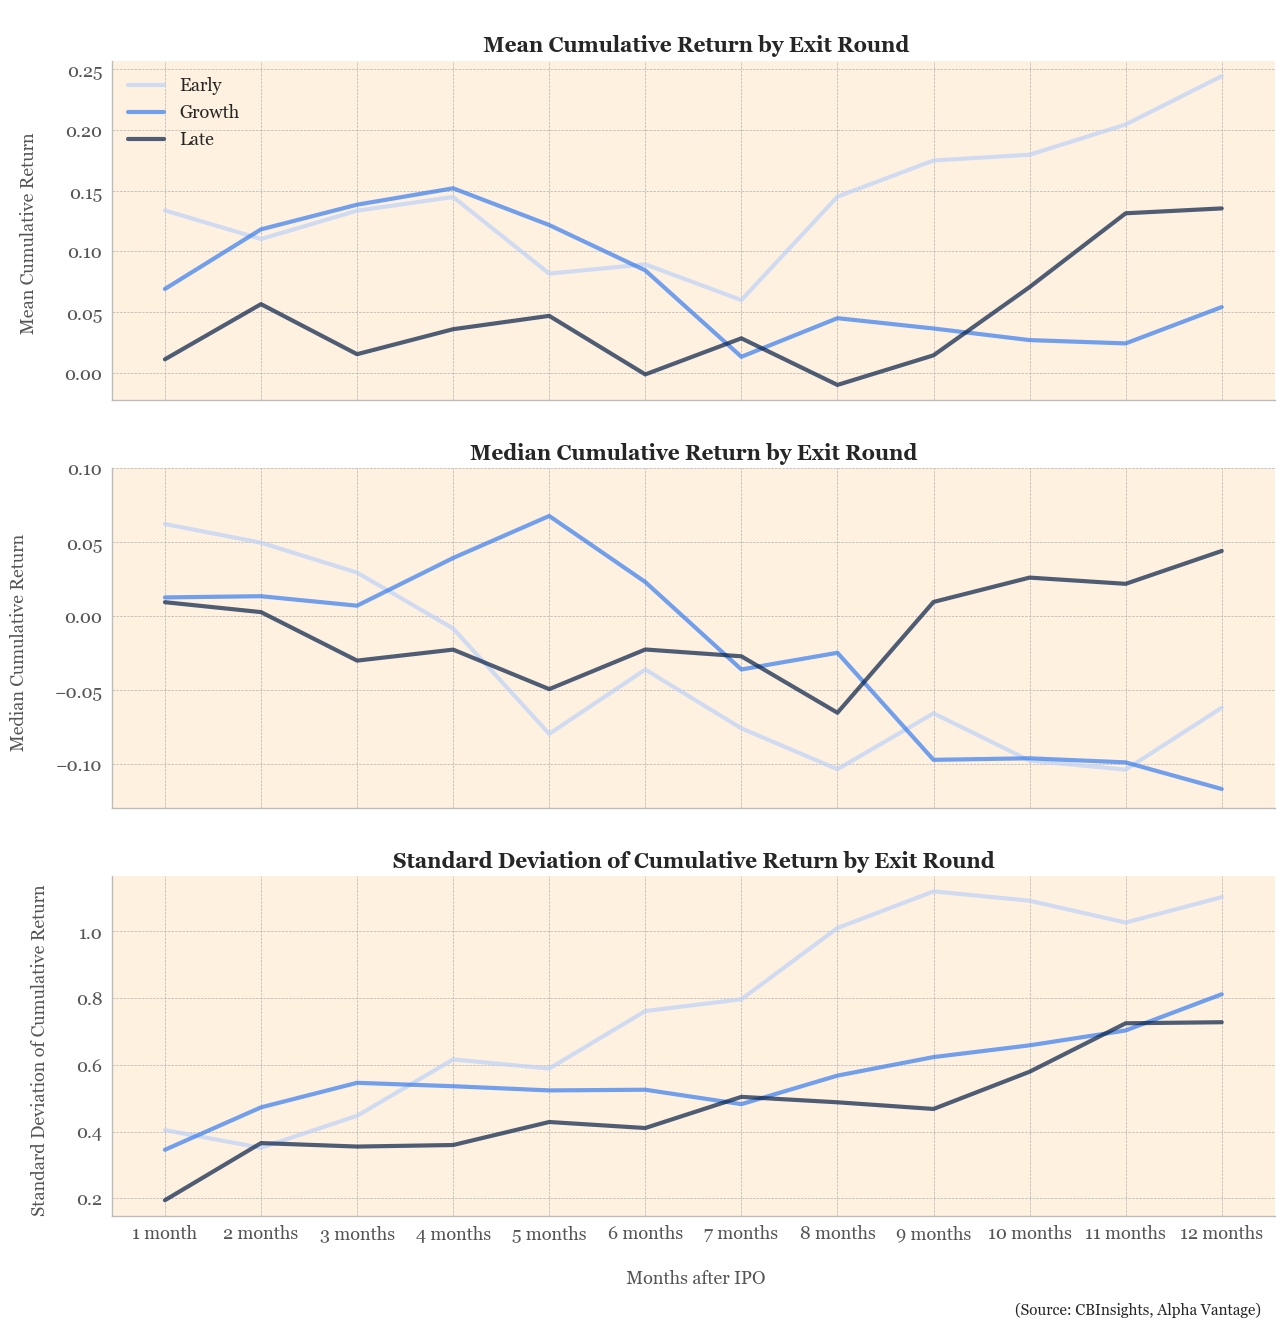

In [1191]:
plt.style.use('bmh')

fig, ax = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize = (15,15))

from matplotlib import rcParams
plt.rcParams['font.family'] = 'georgia'

# Plot Chart 

ax[0].plot(groupby_exitround_mean.transpose().Early, c = "#BCD3FA", lw = 3, alpha = 0.7)
ax[0].plot(groupby_exitround_mean.transpose().Growth, c = "#377CF0", lw = 3, alpha = 0.7)
ax[0].plot(groupby_exitround_mean.transpose().Late, c = "#051E47", lw = 3, alpha = 0.7)

ax[1].plot(groupby_exitround_median.transpose().Early, c = "#BCD3FA", lw = 3, alpha = 0.7)
ax[1].plot(groupby_exitround_median.transpose().Growth, c = "#377CF0", lw = 3, alpha = 0.7)
ax[1].plot(groupby_exitround_median.transpose().Late, c = "#051E47", lw = 3, alpha = 0.7)

ax[2].plot(groupby_exitround_std.transpose().Early, c = "#BCD3FA", lw = 3, alpha = 0.7)
ax[2].plot(groupby_exitround_std.transpose().Growth, c = "#377CF0", lw = 3, alpha = 0.7)
ax[2].plot(groupby_exitround_std.transpose().Late, c = "#051E47", lw = 3, alpha = 0.7)

# Add Chart Elements

ax[0].set_title("\n Mean Cumulative Return by Exit Round", fontsize = 15, fontweight = "bold")      # Set Title
ax[1].set_title("Median Cumulative Return by Exit Round", fontsize = 15, fontweight = "bold")    # Set Title
ax[2].set_title("Standard Deviation of Cumulative Return by Exit Round", 
                fontsize = 15, fontweight = "bold")                                              # Set Title

ax[0].legend(frameon = False, loc = "upper left", fontsize = 13)             # Add Labels

ax[0].set_ylabel("Mean Cumulative Return \n", fontsize = 13)                    # Label y axes
ax[1].set_ylabel("Median Cumulative Return  \n", fontsize = 13)                  # Label y axes
ax[2].set_ylabel("Standard Deviation of Cumulative Return  \n", fontsize = 13)   # Label y axes

ax[1].set_ylim(-0.13, 0.1)

ax[2].set_xlabel("\n Months after IPO", fontsize = 13)                       # Add x-axis label

ax[2].text(8.85,-0.15, "(Source: CBInsights, Alpha Vantage)", fontsize = 11) # Add Source 

for var in ax:
    var.spines["right"].set_visible(False)                                   # Remove Right Spine
    var.spines["top"].set_visible(False)                                     # Remove Top Spine
    var.tick_params(axis='both', labelsize= 13)
    var.set_facecolor('#FFF1E0')                                             # Change graph background

# Save
    
plt.savefig("exitround.png", bbox_inches = "tight", facecolor='#FFF1E0', edgecolor='#FFF1E0')        

plt.show()

### 3.2 Cumulative Returns after 12 months (by Sector)

Below I plot the cumulative returns after 12 months using the sector groups...

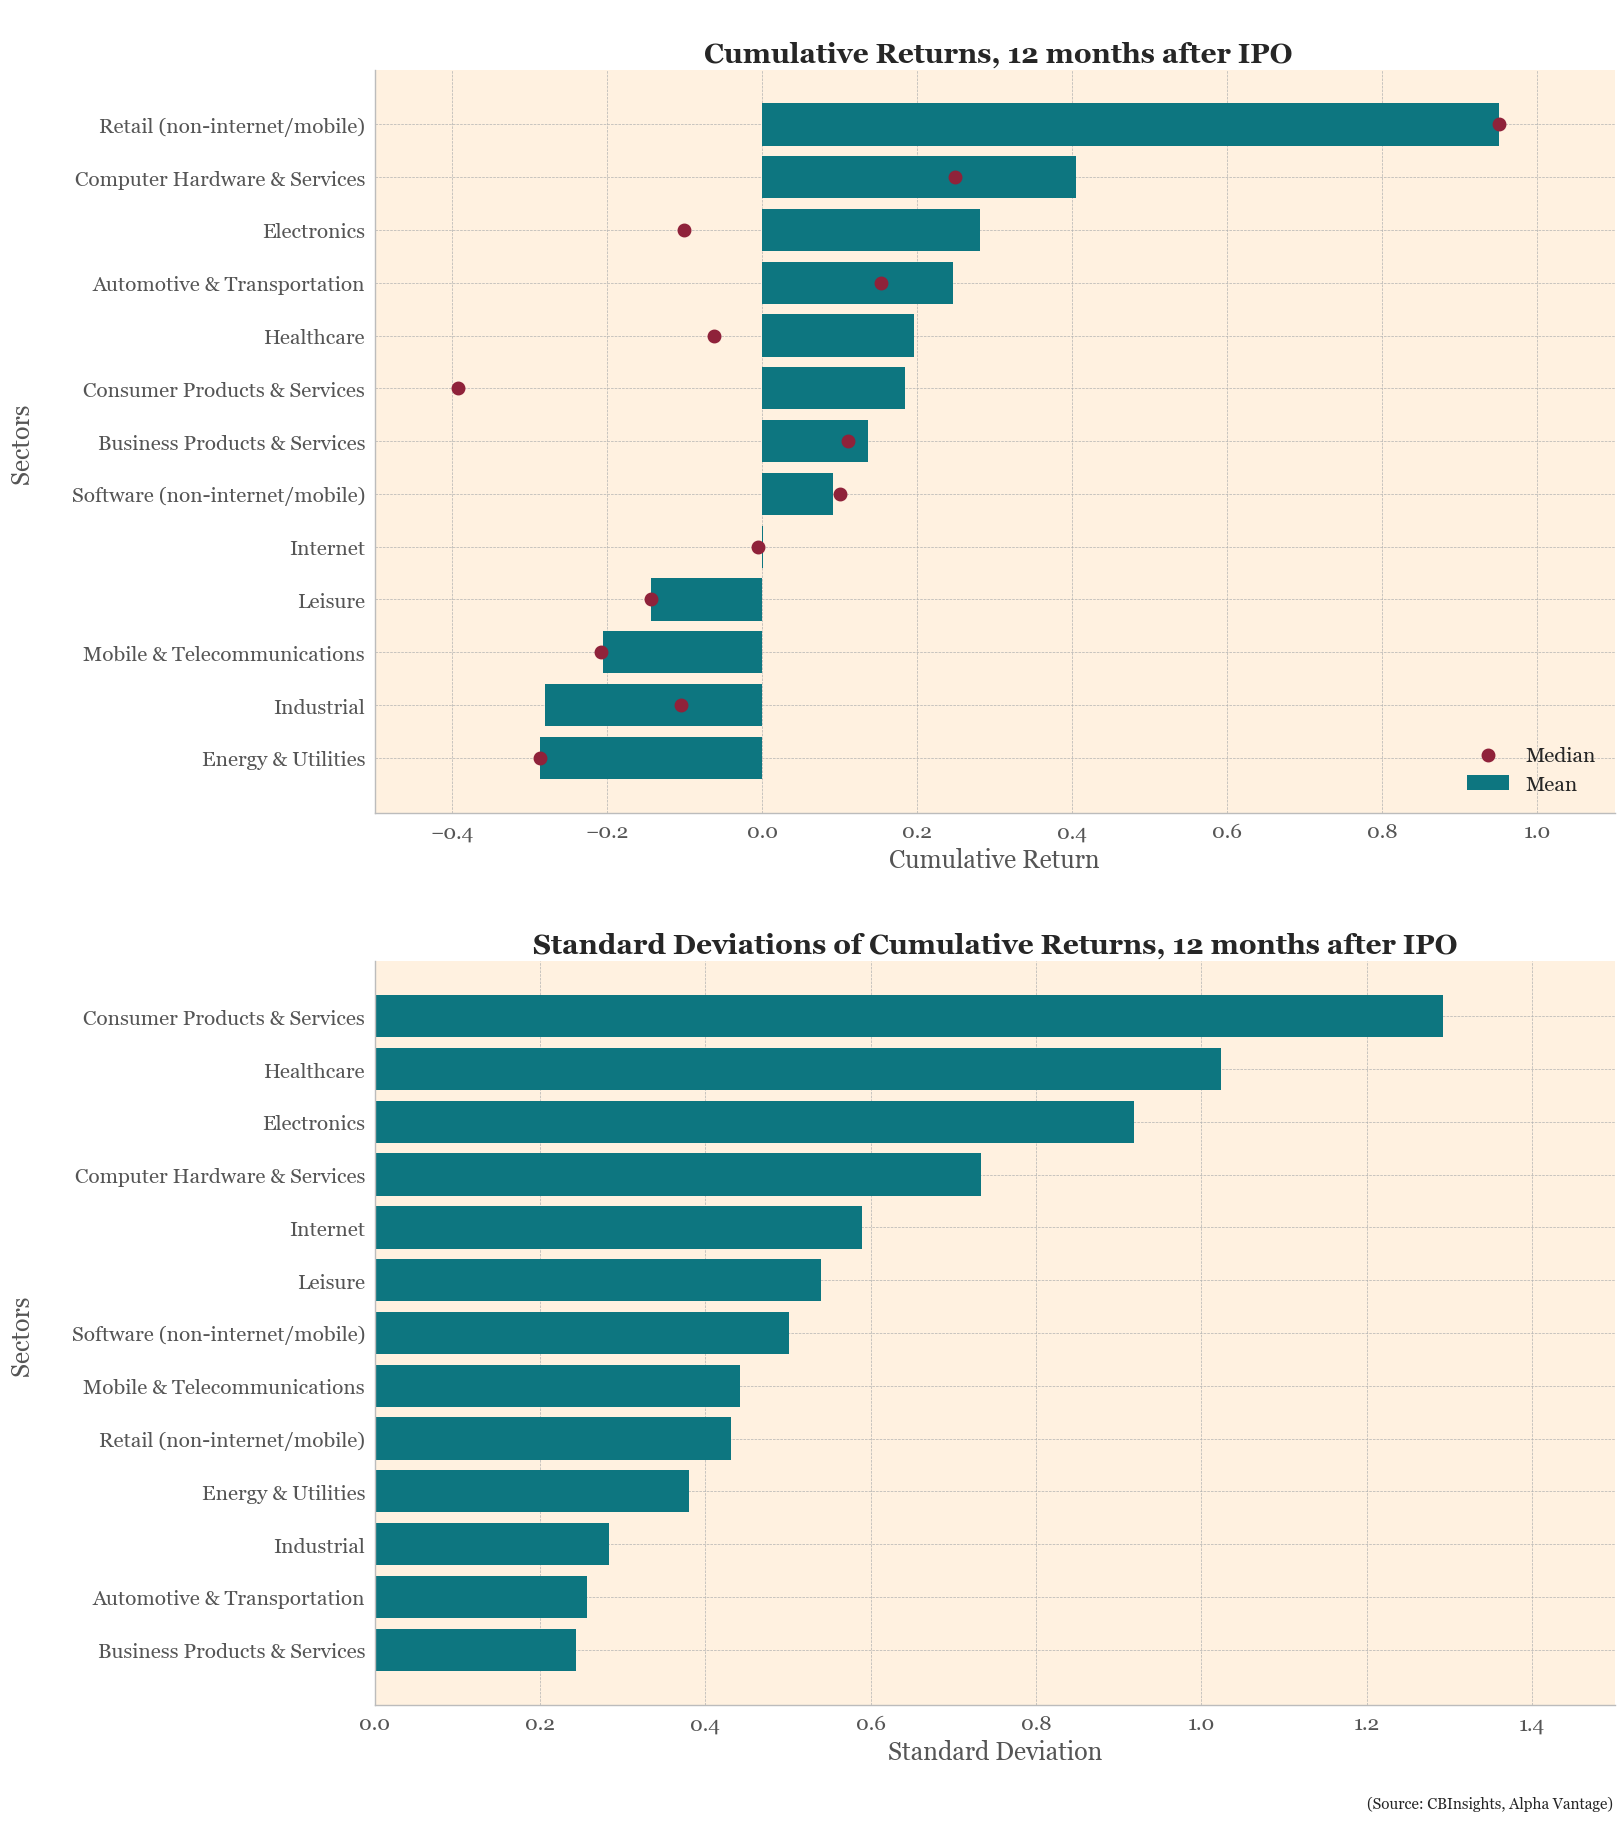

In [1190]:
plt.style.use('bmh')

fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (16,15))
plt.subplots_adjust(top=1.2)


from matplotlib import rcParams
plt.rcParams['font.family'] = 'georgia'

ax[0] = plt.subplot(211)
ax[1] = plt.subplot(212)

# Plot Chart 

sector_mean_12m = groupby_sector_mean.sort_values("12 months")["12 months"]

ax[0].barh(sector_mean_12m.index, sector_mean_12m, color = "#0D7680", lw = 3, alpha = 1, zorder = 1)

sector_median_12m = groupby_sector_median.sort_values("12 months")["12 months"]

ax[0].scatter(sector_median_12m, sector_median_12m.index, color = "#8F223A", lw = 3, alpha = 1, zorder = 2)

sector_std_12m = groupby_sector_std.sort_values("12 months")["12 months"]

ax[1].barh(sector_std_12m.index, sector_std_12m, color = "#0D7680", lw = 3, alpha = 1, zorder = 2)

# Add Chart Elements

ax[0].set_title("\n Cumulative Returns, 12 months after IPO", 
                fontsize = 20, fontweight = "bold")                                         # Set Title
ax[1].set_title("Standard Deviations of Cumulative Returns, 12 months after IPO", 
                fontsize = 20, fontweight = "bold")                                         # Set Title

ax[0].legend(["Median","Mean"], frameon = False, loc = "lower right", fontsize = 15)        # Add Legend

ax[0].set_xlabel("Cumulative Return", fontsize = 18)                         # Add x-axis label
ax[1].set_xlabel("Standard Deviation", fontsize = 18)                        # Add x-axis label
ax[0].set_ylabel("Sectors \n", fontsize = 18)                                # Add y-axis label
ax[1].set_ylabel("Sectors \n", fontsize = 18)                                # Add y-axis label


ax[1].text(1.2,-3, "(Source: CBInsights, Alpha Vantage)", 
            fontsize = 11, fontname = "georgia")                             # Add Source 

ax[0].set_xlim(-0.5,1.1)                                                     # Set x axis limits
ax[1].set_xlim(0,1.5)                                                        # Set x axis limits

for var in ax:
    var.spines["right"].set_visible(False)                                   # Remove Right Spine
    var.spines["top"].set_visible(False)                                     # Remove Top Spine
    var.tick_params(axis='both', labelsize= 15)
    var.set_facecolor('#FFF1E0')                                             # Change graph background
    
# Save
    
plt.savefig("sector.png", bbox_inches = "tight", facecolor='#FFF1E0', edgecolor='#FFF1E0') 

plt.show()

### 3.3 Cumulative Returns vs. Time (Company)

Below I plot the cumulative returns of a company. Based on 3.1 and 3.2, company that operated in Retail and exited in the Growth Stage performed the best. One example of this company is "Restoration Hardware" (ticker: RH)

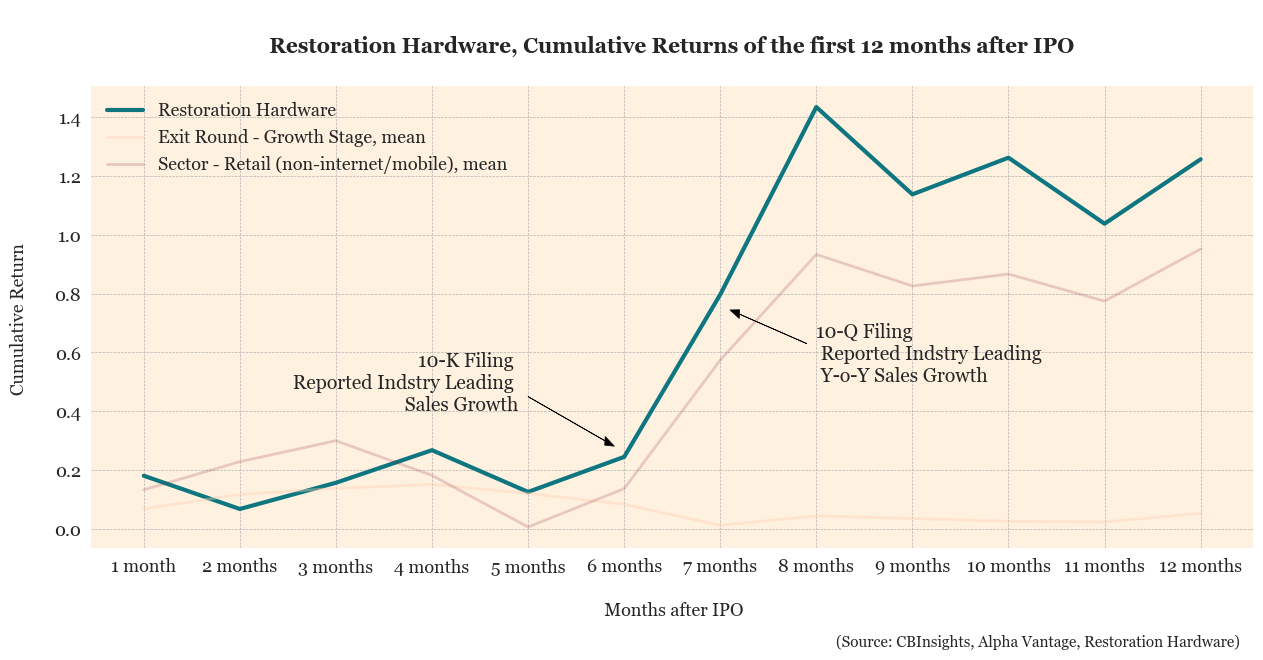

In [1188]:
plt.style.use('bmh')

fig, ax = plt.subplots(sharex = True, figsize = (15,6))

from matplotlib import rcParams
plt.rcParams['font.family'] = 'georgia'

# Plot Chart 

months = ["1 month", "2 months", "3 months", "4 months", "5 months", "6 months",
          "7 months", "8 months","9 months" ,"10 months", "11 months", "12 months"]
Restoration_Hardware = IPOstockdf.iloc[9][months]

ax.plot(Restoration_Hardware, c = "#0D7680", lw = 3, alpha = 1)
ax.plot(groupby_exitround_mean.transpose().Growth, c = "#FFCFB3", lw = 2, alpha = 0.4)
ax.plot(groupby_sector_mean.transpose()["Retail (non-internet/mobile)"], c = "#8F223A", lw = 2, alpha = 0.2)

# Add Chart Elements

ax.set_title("\n Restoration Hardware, Cumulative Returns of the first 12 months after IPO \n"
             , fontsize = 15, fontweight = "bold")                      # Set Title

ax.legend(["Restoration Hardware","Exit Round - Growth Stage, mean", 
           "Sector - Retail (non-internet/mobile), mean"],
          frameon = False, loc = "upper left", fontsize = 13)           # Add Labels

ax.set_ylabel("Cumulative Return \n", fontsize = 13)               # Label y axes
ax.set_xlabel("\n Months after IPO", fontsize = 13)                     # Add x-axis label

ax.spines["right"].set_visible(False)                                   # Remove Right Spine
ax.spines["top"].set_visible(False)                                     # Remove Top Spine
ax.tick_params(axis='both', labelsize= 13)
ax.set_facecolor('#FFF1E0')                                             # Change graph background

ax.text(7.2,-0.4, "(Source: CBInsights, Alpha Vantage, Restoration Hardware)", 
            fontsize = 11, fontname = "georgia")                        # Add Source 

# Annotate

ax.annotate("10-K Filing \n Reported Indstry Leading \n Sales Growth", 
            xy=(3, 0.5), xytext=(3.9, 0.4), fontsize=14, horizontalalignment="right")
ax.arrow(4, 0.45, 0.8, -0.15, head_width=0.03, head_length=0.1, fc='k', ec='k')

ax.annotate("10-Q Filing \n Reported Indstry Leading \n Y-o-Y Sales Growth", 
            xy=(7, 0.5), xytext=(7, 0.5), fontsize=14, horizontalalignment="left")
ax.arrow(6.9, 0.63, -0.7, 0.1, head_width=0.03, head_length=0.1, fc='k', ec='k')

# Save
    
plt.savefig("rh.png", bbox_inches = "tight", facecolor='#FFF1E0', edgecolor='#FFF1E0') 

plt.show()

------------------------